<a href="https://colab.research.google.com/github/AhnJG/AI-Project/blob/master/Colab/audio_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

signal shape :  (661794,)


Text(0.5, 1.0, 'Waveform')

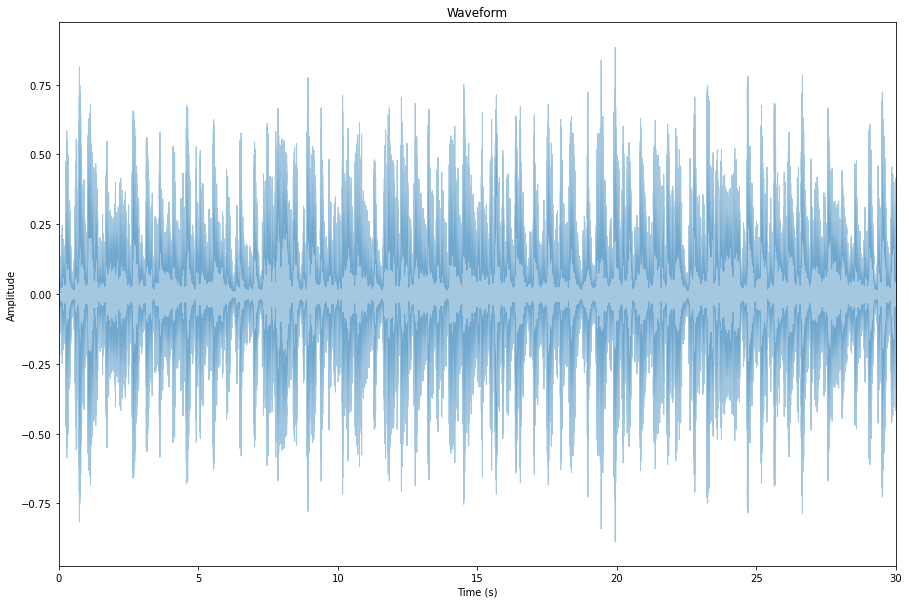

In [ ]:
FIG_SIZE = (15, 10)
file = "blues.00000.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)
print('signal shape : ', signal.shape)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

fft shape :  (661794,)
spectrum shape :  (661794,)
f shape :  (661794,)
left_spectrum shape :  (330897,)
left_f shape :  (330897,)


Text(0.5, 1.0, 'Power spectrum')

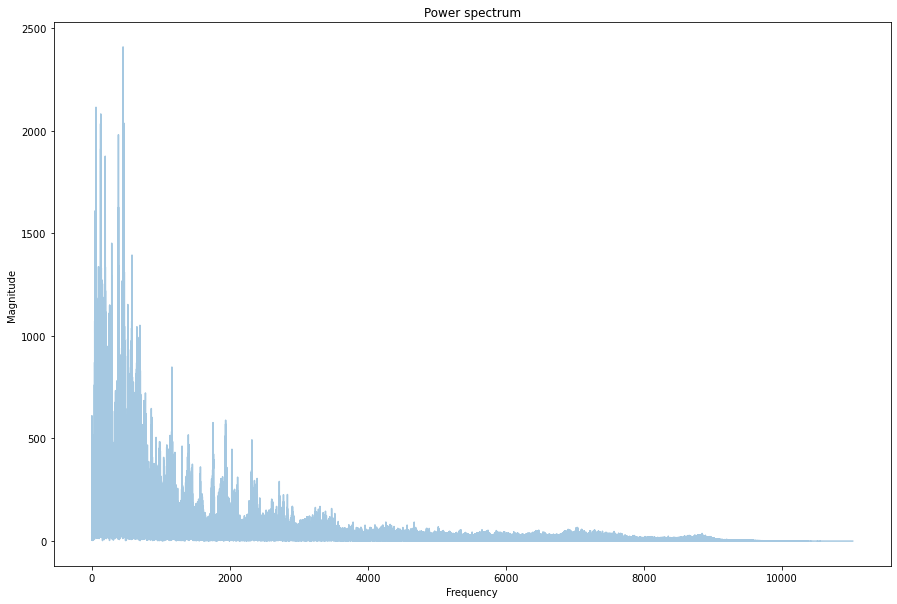

In [ ]:
# FFT -> power spectrum
# perform Fourier Transform
fft = np.fft.fft(signal)
print("fft shape : ", fft.shape)

# Calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
print("spectrum shape : ", spectrum.shape)

# Create Frequency Variable
f = np.linspace(0, sample_rate, len(spectrum))
print("f shape : ", f.shape)

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
print('left_spectrum shape : ', left_spectrum.shape)
print('left_f shape : ', left_f.shape)

# plot specturm
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# Calculate duration hop length and window in seconds 
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))
print("STFT window duration is : {}s".format(n_fft_duration))

STFT hop length duration is : 0.023219954648526078s
STFT window duration is : 0.09287981859410431s


stft shape :  (1025, 1293)
spectrogram shape :  (1025, 1293)


Text(0.5, 1.0, 'Spectrogram')

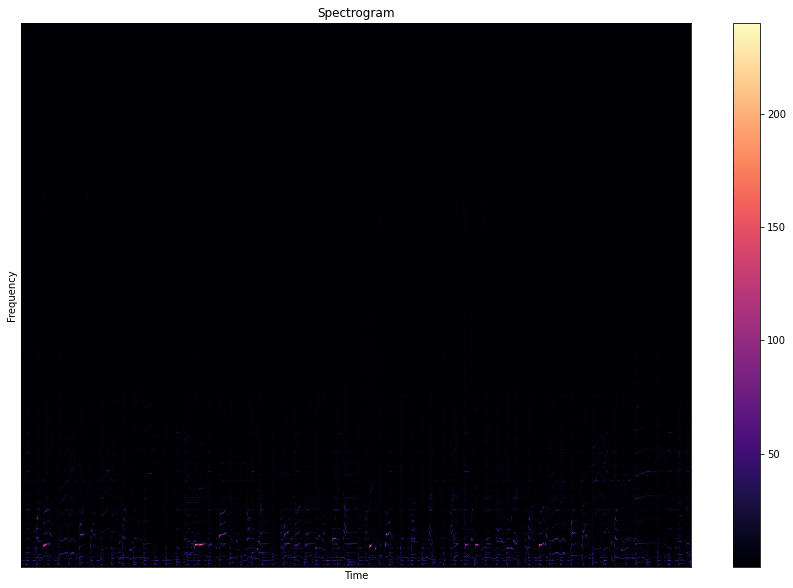

In [ ]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print("stft shape : ", stft.shape)

# Calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
print("spectrogram shape : ", spectrogram.shape)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

log spectrogram shape :  (1025, 1293)


Text(0.5, 1.0, 'Spectrogram *dB')

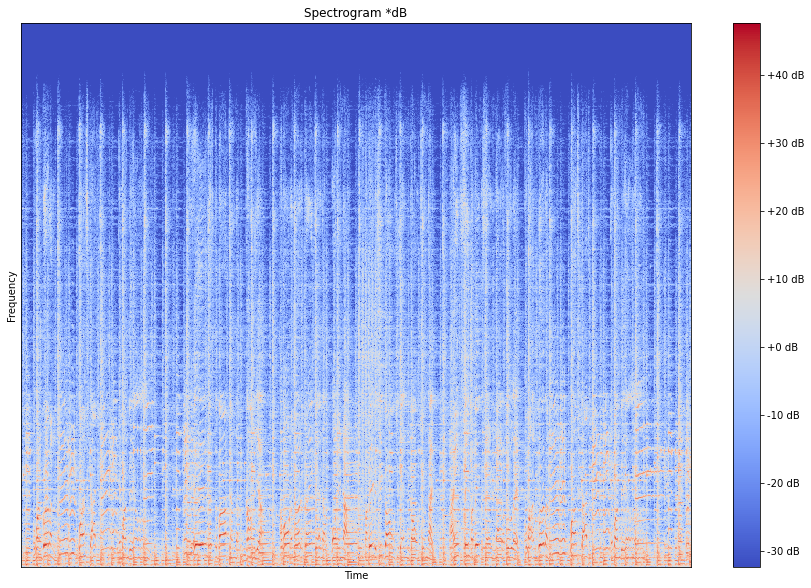

In [ ]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
print("log spectrogram shape : ", log_spectrogram.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram *dB")

In [5]:
import librosa, librosa.display
signal, sample_rate = librosa.load('/content/blues.00000.wav', sr=22050)
print(signal.shape, sample_rate)

(661794,) 22050


In [8]:
import matplotlib.pyplot as plt


In [10]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
FIG_SIZE = (15, 10)

MFCCs.shape : (13, 1293)


Text(0.5, 1.0, 'MFCCs')

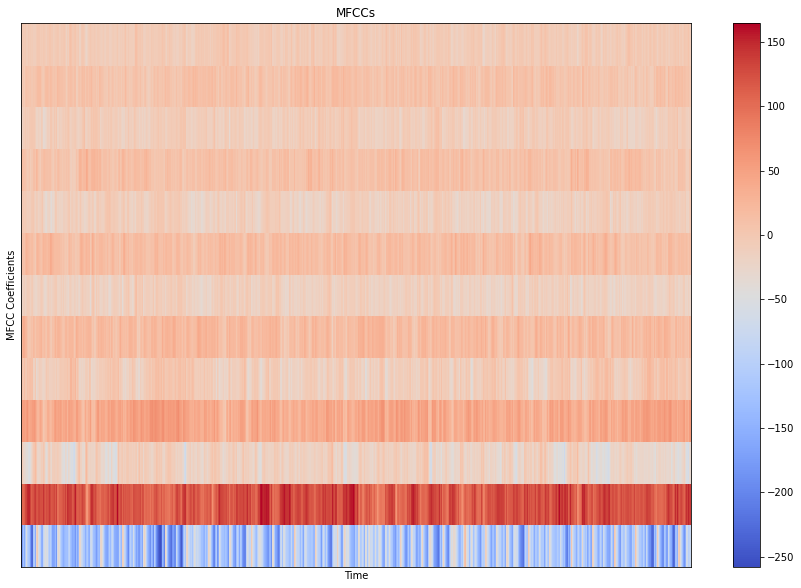

In [12]:
# MFCCs
# Extract 13 MFCCs

MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
print('MFCCs.shape :', MFCCs.shape)

# Display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.title("MFCCs")